# Instagram Post Reach Prediction

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# importing the data
df = pd.read_csv('instagram_reach.csv')

In [3]:
df.shape

(100, 8)

In [4]:
df.head()

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


In [5]:
df.tail()

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
95,8,19,michaelgarza__,"328 S. Wetherly Drive, Beverly Hills, CA 90212...",614,#beverlyhills #realestate#losangelesrealestate...,3 hours,31
96,9,21,dvlp_search,Credit @tristankappel To find more dvlp follow...,450,#workspace #work #developer#development #devel...,3 hours,42
97,10,22,ecom.space,We are coming up with the Best 21 Books that w...,182,#books #book #motivation #inspiration #life#bo...,3 hours,10
98,11,24,lb3enterprises,We’re only paid to move dirt once. It’s not ju...,2039,#heavyequipment #underconstruction#dozer #real...,3 hours,222
99,12,25,palmariusdev,Obtén tu tienda en línea ahora.,741,#marketing #programming#development #desarroll...,3 hours,109


In [6]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True, errors = 'ignore')

In [7]:
df.head(3)

,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   S.No               100 non-null    int64 
 1   USERNAME           100 non-null    object
 2   Caption            94 non-null     object
 3   Followers          100 non-null    int64 
 4   Hashtags           100 non-null    object
 5   Time since posted  100 non-null    object
 6   Likes              100 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 5.6+ KB


In [9]:
df.describe()

,S.No,Followers,Likes
count,100.000000,100.00000,100.00000
mean,16.240000,961.96000,46.48000
std,7.384286,1014.62567,55.08698
min,1.000000,11.00000,8.00000
25%,10.750000,252.75000,19.00000
50%,16.500000,612.00000,29.00000
75%,22.250000,1197.00000,46.00000
max,30.000000,4496.00000,349.00000


In [10]:
df['Time since posted'].value_counts()

2 hours     57
3 hours     19
4 hours     13
7 hours      3
11 hours     2
8 hours      1
20 hours     1
14 hours     1
24 hours     1
9 hours      1
5 hours      1
Name: Time since posted, dtype: int64

In [11]:
# replacing 'hours' in "Time since posted" column to an empty string

df['Time since posted'] = df['Time since posted'].str.replace("hours", "")

In [12]:
df['Time since posted'].head()

0    11 
1     2 
2     2 
3     3 
4     3 
Name: Time since posted, dtype: object

In [13]:
df['Time since posted'].value_counts()

2      57
3      19
4      13
7       3
11      2
5       1
8       1
9       1
14      1
24      1
20      1
Name: Time since posted, dtype: int64

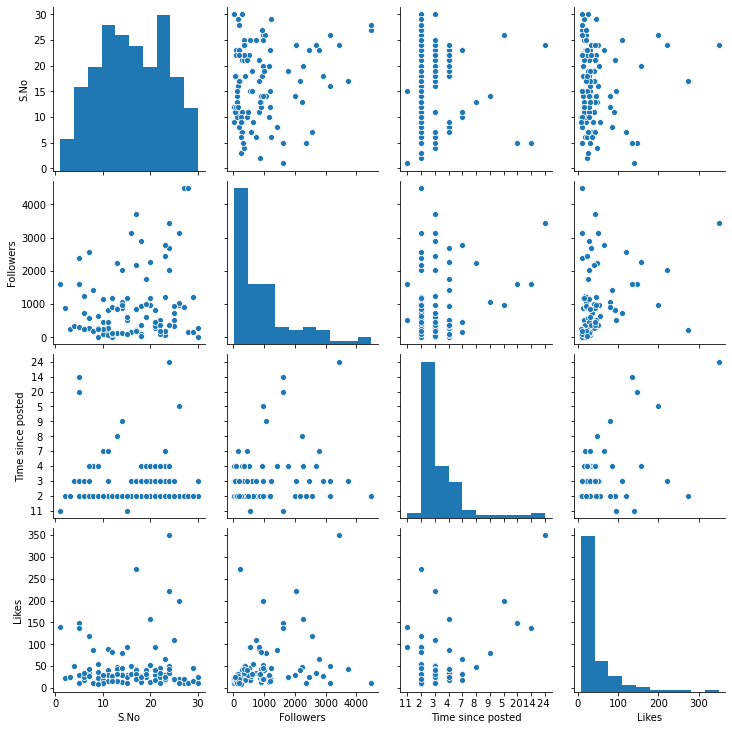

In [14]:
sns.pairplot(df)
plt.show()

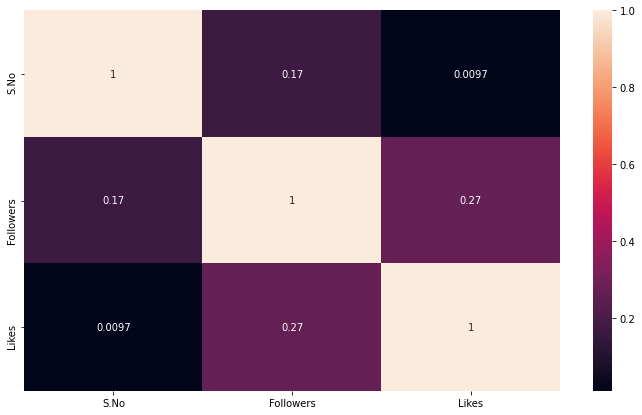

In [15]:
plt.figure(figsize = (12, 7))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [16]:
X = df.iloc[:, [3, 5]].values
y = df.iloc[:, -1].values

In [17]:
X[:10]

array([[1600, '11 '],
       [880, '2 '],
       [255, '2 '],
       [340, '3 '],
       [304, '3 '],
       [1231, '3 '],
       [259, '3 '],
       [1433, '4 '],
       [13, '4 '],
       [450, '7 ']], dtype=object)

In [18]:
y[:10]

array([139,  23,  25,  49,  30,  18,  35,  86,  22,  18], dtype=int64)

In [19]:
X.shape, y.shape

((100, 2), (100,))

In [20]:
# splitting the data into training and testing set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [21]:
X_train[:10], X_test[:10]

(array([[255, '2 '],
        [2372, '2 '],
        [182, '3 '],
        [577, '2 '],
        [2691, '4 '],
        [1168, '2 '],
        [49, '3 '],
        [1618, '20 '],
        [1180, '2 '],
        [193, '2 ']], dtype=object),
 array([[140, '2 '],
        [361, '3 '],
        [610, '2 '],
        [888, '2 '],
        [179, '2 '],
        [520, '4 '],
        [835, '2 '],
        [845, '2 '],
        [1003, '2 '],
        [2014, '2 ']], dtype=object))

In [22]:
y_train, y_test

(array([ 25,  10,  10,  27,  34,  13,  24, 148,  24,  18,  41, 109,  65,
         31,  29,  24,  43,  11,  11, 273,  43,  24,  55,  53,  14,   8,
         31,  46,  25, 222,  81, 349,  10,  30,  21,  20,  19,   9,  49,
         35,  90,  31,  21,  41,  51,  16,  22,  16, 139,  32,  10,  20,
         10,  16,  86,  42,  94,  19,  24,  28,  37,  43,  48,  30, 198,
         25,  46,  35,  50,  11,  23,  29,  19,  29,  18, 119,  18,  20,
         80,  24], dtype=int64),
 array([ 28,  33,  30,  43,  20,  46,  93,  31,  40,  29,  12, 136,  17,
         17, 157,  14,  19,  16,  12,  31], dtype=int64))

In [23]:
X_train.shape, X_test.shape

((80, 2), (20, 2))

In [24]:
y_train.shape, y_test.shape

((80,), (20,))

In [25]:
# fitting our data to linear regression model

from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
# Interpreting Model Coefficients
print(lm.intercept_)
print(lm.coef_)

9.102663012943509
[3.9015428e-03 9.8362686e+00]


In [27]:
y_pred = lm.predict(X_test)

In [28]:
y_pred

array([ 29.32141621,  40.01992577,  31.15514132,  32.23977022,
        29.47357638,  50.47653967,  32.03298845,  32.07200388,
        32.68844764,  36.63290742,  29.18876375, 153.05289191,
        30.8430179 ,  49.80547431,  57.33155037,  32.26317948,
        28.82201873,  29.23558227,  29.73497974,  78.5378731 ])

In [29]:
# Comparing our model predictions with actual values

comp = pd.DataFrame({"Actual Values" : y_test, "Predicted Values" : y_pred.round(0)})
comp[:20]

,Actual Values,Predicted Values
0,28,29.0
1,33,40.0
2,30,31.0
3,43,32.0
4,20,29.0
5,46,50.0
6,93,32.0
7,31,32.0
8,40,33.0
9,29,37.0


In [30]:
# Calculating accuray of our model

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error of our model is {mse}")

Mean Squared Error of our model is 953.7617187966853
